<h1><center> 10-315 Introduction to Machine Learning (SCS Majors) <br> Lecture 7: Logistic Regression </center></h1> 


<h2><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h2> 


<br>

<br>

<br>

<br>


Reading: <a href ="http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf"> Generative and Disciminative Classifiers </a> by Tom Mitchell.

#### Lecture outcomes:
- Logistic Regression
- Gradient Descent Review
- Comparing LR and GNB


### The Naïve Bayes Algorithm

Naïve Bayes assumes conditional independence of the $X_i$'s: $P(X_1,...,X_d|Y) =\prod_i P(X_i|,Y)$ 


$$ P(Y=y_k|X_1,...,X_d) = \frac{P(Y=y_k) \prod_i P(X_i|Y=y_k) }{P(X)} $$

- Train the algorithm (estimate $P(X_i|Y=y_k)$ and $P(Y=y_k)$)

- To classify, pick the most probable $Y^{\text{new}}$ for a new sample $X^{\text{new}} = (X_1^{\text{new}},X_2^{\text{new}},...,X_d^{\text{new}})$ as:


$$ Y^{\text{new}} \leftarrow \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X_i^{\text{new}}|Y=y_k) $$





### Naïve Bayes - Training and Prediction Phase - Discrete $X_i$


Training:
- Estimate $\pi_k \equiv P(Y=y_k)$, get  $\hat\pi_k$
- Estimate $\theta_{ijk} \equiv P(X_i=x_{ij}|Y=y_k)$, get $\hat\theta_{ijk}$
    - $\theta_{ijk}$ is estimate for each label $y_k$:
        - For each variable $X_i$:
            - For each value $x_{ij}$ that $X_i$ can take.


- Prediction: Classify $Y^{\text{new}}$
\begin{eqnarray}Y^{\text{new}} &=& \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X^{\text{new}}_i=x^{\text{new}}_j|Y=y_k) \\
&=& \underset{y_k}{\operatorname{argmax}} \pi_k\prod_i  \theta_{i,X^\text{new}_i,k}
\end{eqnarray}


#### Method 1: Maximum (Conditional) Likelihood Estimation
#### <font color=black> Method 2:</font> Maximum A Posteriori Probability Estimation


## Gaussian Naïve Bayes Algorithm – continuous $X_i$ (but still discrete Y)


- Training:
    - Estimate $\pi_k \equiv P(Y=y_k)$ 
    - Each label $y_k$:  
        - For each variable $X_i$ estimate $P(X_i=x_{ij}|Y=y_k) $:
            - estimate class conditional mean $\mu_{ik}$ and standard deviation $\sigma_{ik}$


- Prediction: Classify $Y^{\text{new}}$
\begin{eqnarray}Y^{\text{new}} &=& \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X^{\text{new}}_i=x^{\text{new}}_j|Y=y_k) \\
&=& \underset{y_k}{\operatorname{argmax}} \pi_k\prod_i  \mathcal{N} (X_i^{\text{new}}; \mu_{ik}, \sigma_{ik})
\end{eqnarray}

<!-- get  $\hat\pi_k$ -->


## Estimating Parameters: $Y$ discrete, $X_i$ continuous 

### Maximum (Conditional) Likelihood Estimation

\begin{eqnarray}
\hat\mu_{ik} = \frac{1}{\sum_j \delta(Y^j = y_k) } \sum_j X_i^j \delta(Y^j = y_k)
\end{eqnarray}

- i: index of feature
- j: index of data point
- k: index of class
- $\delta$ function is 1 if argument is true and 0 otherwise

\begin{eqnarray}
\hat\sigma^2_{ik} = \frac{1}{\sum_j \delta(Y^j = y_k) } \sum_j (X_i^j - \hat\mu_{ik})^2\delta(Y^j = y_k)
\end{eqnarray}


## Let's simulate the behavior of GNB!

We saw:

- What happens if the variances are the same across classes?
- What could happen if the variables are not really conditionally independent? 

[-10, 10, -10, 10]

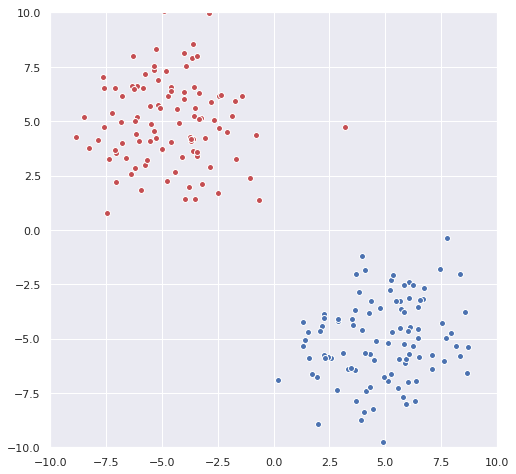

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
sns.set_theme()
 
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)

# Assume I know the true parameters, this is not the case usually!
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

# Sample data from these distributions
X_positive = norm.rvs(loc=[mu_1_1,mu_2_1], scale=[sigma_1_1, sigma_2_1], size = (100,2))
X_negative = norm.rvs(loc=[mu_1_0,mu_2_0], scale=[sigma_1_0, sigma_2_0], size = (100,2))


plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

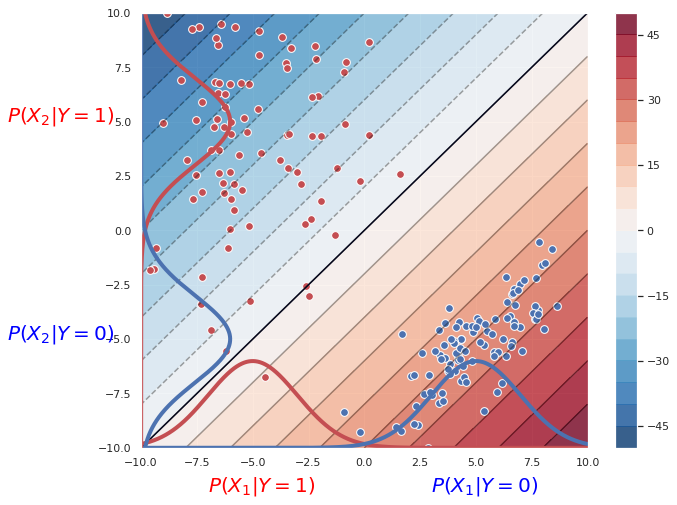

In [48]:
def plot_GNB(X_positive,X_negative,params):
    pY0 =0.5; pY1 = 1- pY0
    P_X1_1 = norm.pdf(x1,params['mu_1_1'],params['sigma_1_1'])
    P_X2_1 = norm.pdf(x1,params['mu_2_1'],params['sigma_2_1'])
    P_X1_0 = norm.pdf(x1,params['mu_1_0'],params['sigma_1_0'])
    P_X2_0 = norm.pdf(x1,params['mu_2_0'],params['sigma_2_0'])
    
    X1,X2 = np.meshgrid(x1, x2)
    # faster way to compute the log ratio, or can use 
    # fX = ratio_log_compute(X1,X2,params)
    fX = np.log(pY1/pY0) + np.log(P_X1_1.reshape([1000,1]).dot(P_X2_1.reshape([1,1000]))/
                             P_X1_0.reshape([1000,1]).dot(P_X2_0.reshape([1,1000])))
    plt.figure(figsize=(10,8))
    # plot contour plot
    cs = plt.contourf(X1, X2, fX,20,cmap='RdBu_r',alpha=0.8);
    plt.colorbar()
    contours = plt.contour(cs, colors='k',alpha=0.4)
    plt.contour(contours,levels=[0],linewidth=5)

    # previous stuff
    plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w',s=60)
    plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w',s=60)
    lim_plot = 10
    plt.plot(x1,P_X1_1*2*lim_plot-lim_plot,'r',linewidth=4)
    plt.text(-7, -12, r'$P(X_1|Y=1)$', color = 'red',fontsize=20)
    plt.plot(x1,P_X1_0*2*lim_plot-lim_plot,'b',linewidth=4)
    plt.text(3, -12, r'$P(X_1|Y=0)$', color = 'blue',fontsize=20)
    plt.plot(P_X2_1*2*lim_plot-lim_plot,x1,'r',linewidth=4)
    plt.text(-16,5,  r'$P(X_2|Y=1)$', color = 'red',fontsize=20)
    plt.plot(P_X2_0*2*lim_plot-lim_plot,x1,'b',linewidth=4)
    plt.text(-16,-5,  r'$P(X_2|Y=0)$', color = 'blue',fontsize=20)
    plt.axis([-lim_plot,lim_plot,-lim_plot,lim_plot],'equal')

    
# Assume I perfectly estimate the parameters (not true for limited data!)
params = dict(mu_1_1 = -5, sigma_1_1 = 2,
            mu_2_1 = 5, sigma_2_1 = 2,
            mu_1_0 = 5, sigma_1_0 = 2,
            mu_2_0 = -5, sigma_2_0 = 2
)

plot_GNB(X_positive,X_negative,params)

[[4 3]
 [3 4]]


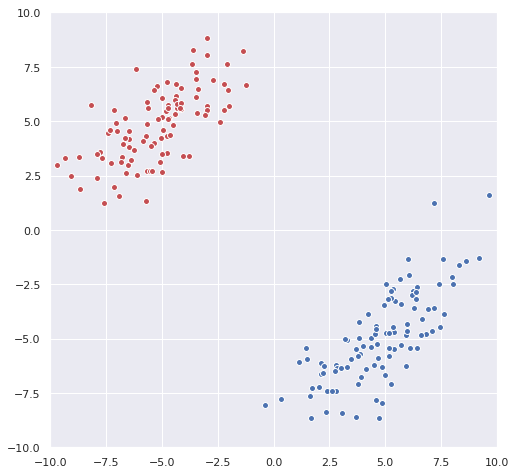

In [28]:
from scipy.stats import multivariate_normal

# Same param as before
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

print(cov_positive)

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (100))


plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal');

## Is GNB a linear separator?

- It depends on whether we allow it to learn different standard deviations for each class

Decision rule:

\begin{eqnarray} 
\ln \frac{P(Y=1|X_1...X_d)}{P(Y=0|X_1...X_d)} = \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i\ln \frac{P(X_i|Y=1)}{P(X_i|Y=0)}  ~ ~ ~ ~ ~ > \text{ or } <0?
\end{eqnarray}  

If $X_i$s are $\mathcal{N}(\mu_{ik},\sigma_{ik})$:

$$p(X_i = x|Y=y_k) = \frac{1}{\sqrt{2\pi\sigma^2_{ik}}} \text{exp}\big({-\frac{1}{2}\frac{(x_{i}-\mu_{ik})^2}{\sigma_{ik}^2}}\big)$$

\begin{eqnarray} 
\ln \frac{P(Y=1|X_1...X_d)}{P(Y=0|X_1...X_d)} &=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i\ln \frac{P(X_i|Y=1)}{P(X_i|Y=0)} \\
&=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i \ln  \frac{\frac{1}{\sigma_{i1}}}{\frac{1}{\sigma_{i0}}} \text{exp} \big( -\frac{1}{2} \frac{(x_{i}-\mu_{i1})^2}{\sigma_{i1}^2} + \frac{1}{2} \frac{(x_{i}-\mu_{i0})^2}{\sigma_{i0}^2}  \big )\\
% &=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i \ln  \frac{\sigma_{i0}}{\sigma_{i1}} -\frac{1}{2} \sum_i   \big(  \frac{(x_{i}-\mu_{i1})^2}{\sigma_{i1}^2} - \frac{(x_{i}-\mu_{i0})^2}{\sigma_{i0}^2}  \big ) \\
&=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i \ln  \frac{\sigma_{i0}}{\sigma_{i1}} -\frac{1}{2} \sum_i   \big(  x_{i} ^2(\frac{1}{\sigma_{i1}^2} - \frac{1}{\sigma_{i0}^2} ) - 
2 x_{i} (\frac{\mu_{i1}}{\sigma_{i1}^2} - \frac{\mu_{i0}}{\sigma_{i0}^2} )
+ (\frac{\mu_{i1}^2}{\sigma_{i1}^2} - \frac{\mu_{i0}^2}{\sigma_{i0}^2} )
\big ) 
\end{eqnarray} 

What happens if we force $\hat\sigma_{i0} =\hat\sigma_{i1}$?
- We get a linear decision boundary. Otherwise, it's a quadratic decision boundary (unless somehow we estimate exactly the same standard deviations).

[[4 3]
 [3 4]]


[-10, 10, -10, 10]

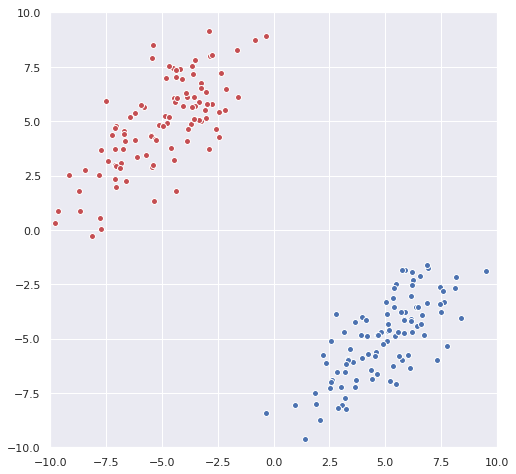

In [39]:
# Same param as before
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

print(cov_positive)

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (100))


plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

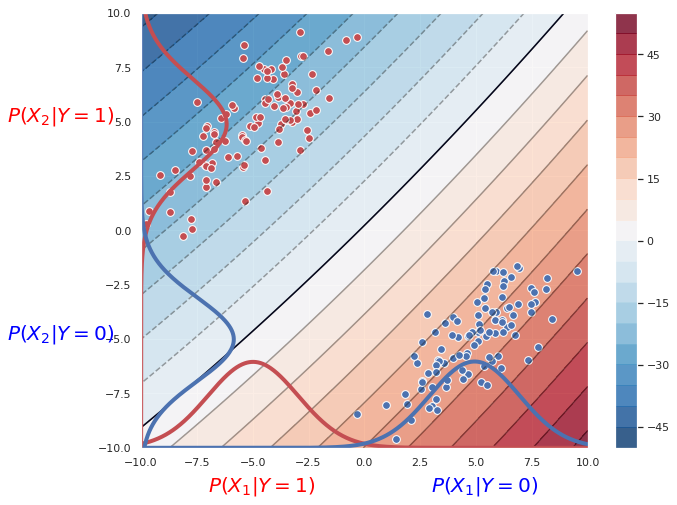

In [40]:
params = dict()
# Estimate - Different variance
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

plot_GNB(X_positive,X_negative,params)

[[ 9  3]
 [ 3 16]]


[-10, 10, -10, 10]

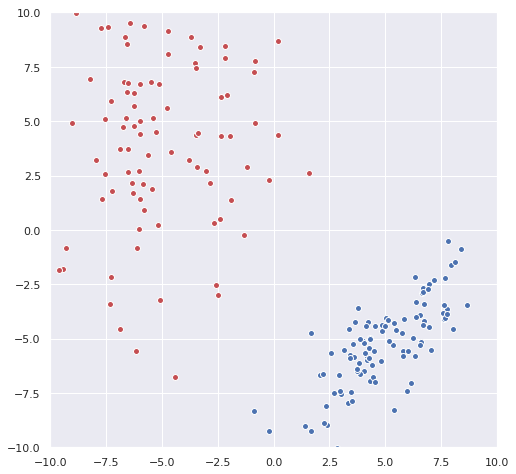

In [41]:
# Let's set up another example in which the variances are actually different
mu_1_1 = -5; sigma_1_1 = 3
mu_2_1 = 5; sigma_2_1 = 4
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

print(cov_positive)

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (100))


plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

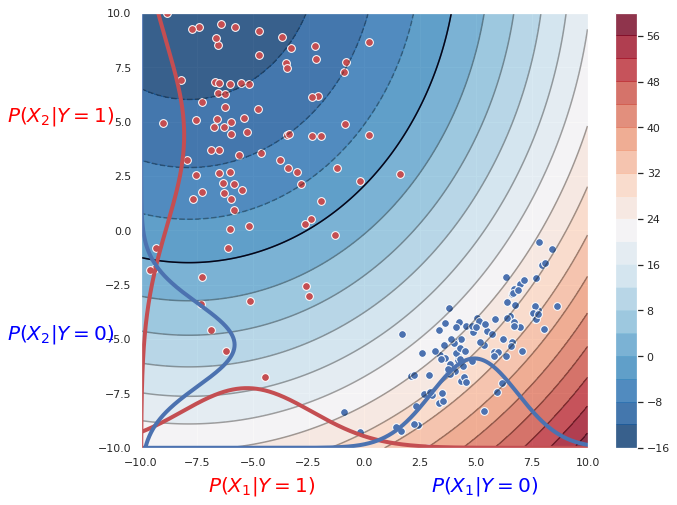

In [42]:
params = dict()
# Estimate - Different variance
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

plot_GNB(X_positive,X_negative,params)

[-10, 10, -10, 10]

<Figure size 360x360 with 0 Axes>

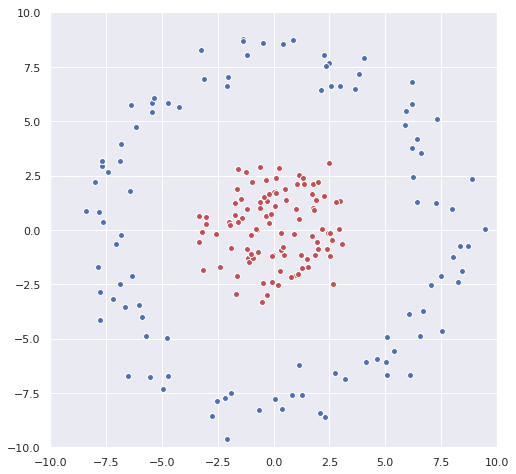

In [36]:
from sklearn import datasets

plt.figure(figsize=(5,5))
X, y = datasets.make_circles(n_samples=200, factor=.25,noise=.1)

# scale
X_positive = X[y==1]*8
X_negative = X[y==0]*8

plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

/Users/lwehbe/env/py3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


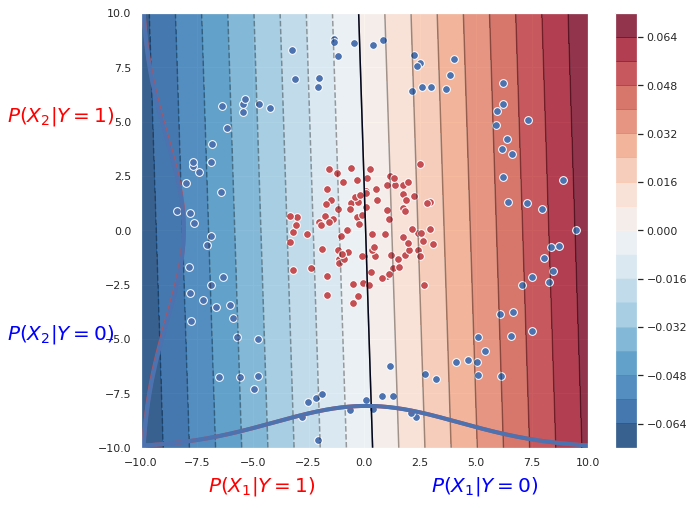

In [37]:
params = dict()
# Artificially force same variances
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(np.vstack([X_positive,X_negative]),axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(np.vstack([X_positive,X_negative]),axis=0) 

plot_GNB(X_positive,X_negative,params)

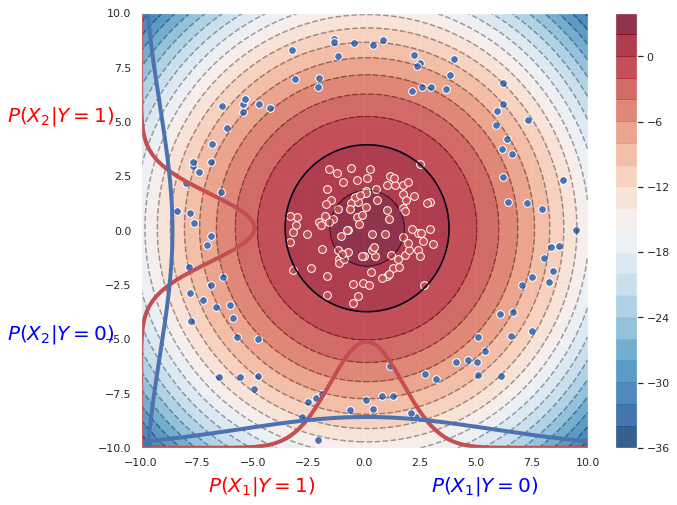

In [38]:
params = dict()
# Estimate - Different variance
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

plot_GNB(X_positive,X_negative,params)

## The last example is a case where the conditional independence assumption is incorrect

- but GNB does very well

## Naïve Bayes is a *Generative* classifier


Generative classifiers:
- Assume a functional form for $P(X,Y)$ (or $P(X|Y)$ and $P(Y)$)
- we can view $P(X|Y)$ as describing how to sample random instances $X$ given $Y$.

### Instead of learning P(X|Y), can we learn P(Y|X) directly or learn the decision boundary directly?

## *Discriminative* classifiers

- Assume some functional form for $P(Y|X)$ or for the decision boundary
- Estimate parameters of $P(Y|X)$ directly from training data

## Logistic Regression is a discriminative classifier

Learns $f: X \rightarrow Y$, where
- X is a vector of real-valued or discrete features, $(X_1,...,X_d)$
- Y is boolean (can also be extended for $K$ discrete classes).
<!-- - assume all $X_i$ are conditionally independent given $Y$ -->
<!--  model P(Xi | Y = yk) as Gaussian N(μik,σi) -->
<!--  model P(Y) as Bernoulli (π) -->

$P(Y|X)$ is modeled as:

\begin{eqnarray}
P(Y=1|X) = \frac{1}{1+\exp(- (w_0+\sum_i w_i X_i))} = \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}
\end{eqnarray}

It uses the logistic (or sigmoid) function: 

\begin{eqnarray}
\frac{1}{1+\exp{-z}}
\end{eqnarray}

Text(0, 0.5, '$P(Y=1|X)$')

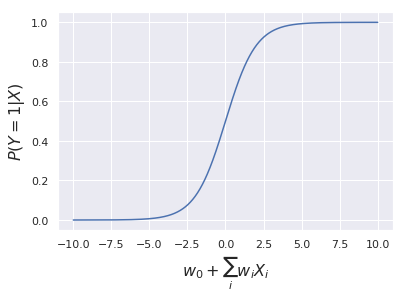

In [478]:
z = np.linspace(-10,10,1000)
plt.plot(z,1/(1+np.exp(-z)))
plt.xlabel(r'$w_0+\sum_i w_i X_i$',fontsize=16)
plt.ylabel(r'$P(Y=1|X)$',fontsize=16)

## What is the form of the decision boundary?

\begin{eqnarray}
\frac{P(Y=1|X)}{P(Y=0|X)} = \frac{ \frac{\exp(w_0+\sum_i w_i X_i)}{\exp(w_0+\sum_i w_i X_i)+1}}{\frac{1}{\exp(w_0+\sum_i w_i X_i)+1}} = \exp(w_0+\sum_i w_i X_i)
\end{eqnarray}

Asking $P(Y=1|X)>P(Y=0|X)$ is the same as asking if $\ln \frac{P(Y=1|X)}{P(Y=0|X)} >0$.

i.e. is $$w_0+\sum_i w_i X_i ~ ~ >0?$$

This is a linear decision boundary!

In [ ]:
# similar to previous example
mu_1_1 = -4; sigma_1_1 = 2;mu_2_1 = 4; sigma_2_1 = 2
mu_1_0 = 4; sigma_1_0 = 2;mu_2_0 = -4; sigma_2_0 = 2
cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )
# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

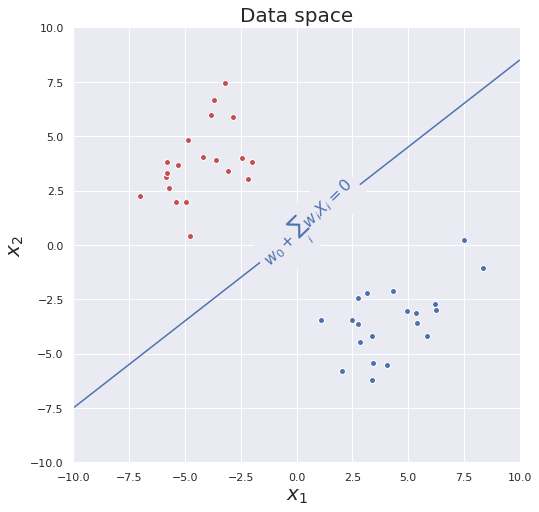

In [500]:
plt.figure(figsize=(8,8))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')

# hand picked line
plt.plot(x1, x1*0.8+0.5)
from labellines import labelLine
labelLine(plt.gca().get_lines()[-1],0.6,label=r'$w_0+\sum_i w_i X_i = 0$',fontsize=16)

plt.axis([-10,10,-10,10],'equal')
plt.xlabel(r'$x_1$',fontsize=20); plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20);

## Gradient Descent 


Review, let's start with a simple function: 


$$f(w) = 0.2(w - 2) ^2 + 1$$


We know that this function is convex (2nd derivative exists and is positive).



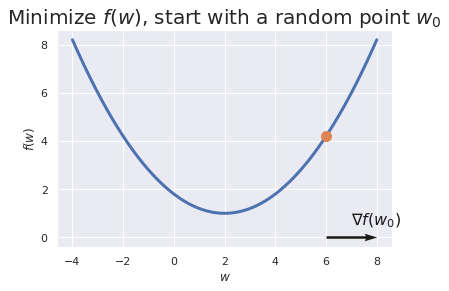

In [450]:
f = lambda w: 0.2*(w-2)**2+1
dfdw = lambda w: 0.4*w - 0.4

w = np.linspace(-4,8,1000)
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

plt.title(r'Minimize $f(w)$, start with a random point $w_0$',fontsize = 20);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)

def draw_vector_2D(ax, x, y, lenx, leny,name,color='k'):
#     grad = np.array([-np.sin(x),np.cos(y)])
    ax.quiver(x,y,lenx, leny, color=color,angles='xy', scale_units='xy', scale=1)
    ax.text(x+lenx/2, y+leny/2+0.5,name,fontsize = 16,color=color)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r'$\nabla f(w_0)$','k')


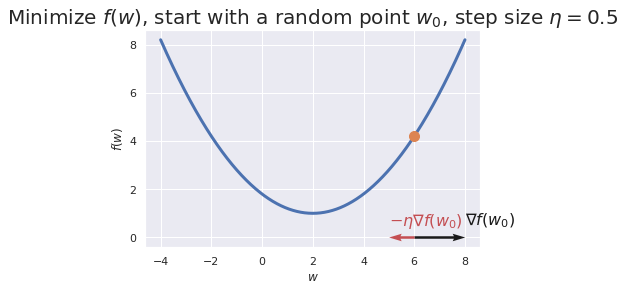

In [440]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

plt.title(r'Minimize $f(w)$, start with a random point $w_0$, step size $\eta=0.5$',fontsize = 20);
w_0 = 6
plt.plot(w_0, f(w_0), "o",markersize=10)

def draw_vector_2D(ax, x, y, lenx, leny,name,color='k'):
    ax.quiver(x,y,lenx, leny, color=color,angles='xy', scale_units='xy', scale=1)
    ax.text(x+lenx, y+0.5,name,fontsize = 16,color=color)
    
draw_vector_2D(plt, w_0, 0, dfdw(w_0),0, r'$\nabla f(w_0)$','k')

eta=0.5

draw_vector_2D(plt, w_0, 0, - dfdw(w_0)*eta,0, r'$-\eta\nabla f(w_0)$','r')

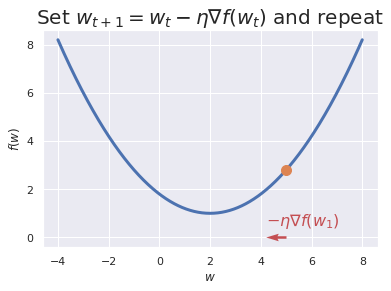

In [441]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

w_1 = w_0 - dfdw(w_0)*eta

plt.title(r'Set $w_{t+1} = w_{t}  - \eta \nabla f(w_t)$ and repeat', fontsize = 20);

plt.plot(w_1, f(w_1), "o",markersize=10)

draw_vector_2D(plt, w_1, 0, - dfdw(w_1)*eta,0, r'$-\eta\nabla f(w_1)$','r')

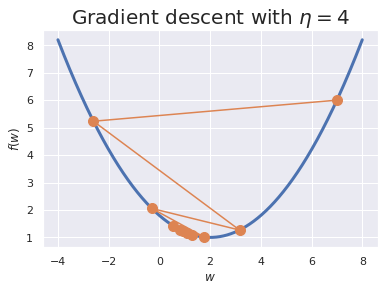

In [442]:
plt.plot(w, f(w), linewidth=3 )
plt.xlabel(r'$w$')
plt.ylabel(r'$f(w)$')

# w_1 = w_0 - dfdw(w_0)*eta
w_t = np.zeros(10)
w_t[0] = 7  # w_0
 
eta = 4
    
for i in range(1,10):
    w_t[i] =  w_t[i-1] - eta * dfdw(w_t[i-1] )

plt.title(r'Gradient descent with $\eta={}$'.format(eta), fontsize = 20);

plt.plot(w_t, f(w_t), "o-",markersize=10)

# draw_vector_2D(plt, w_1, 0, - dfdw(w_1)*eta,0, r'$-\eta\nabla f(w_1)$','r')

## Multiple variables


Now let's assume the following logistic model does 


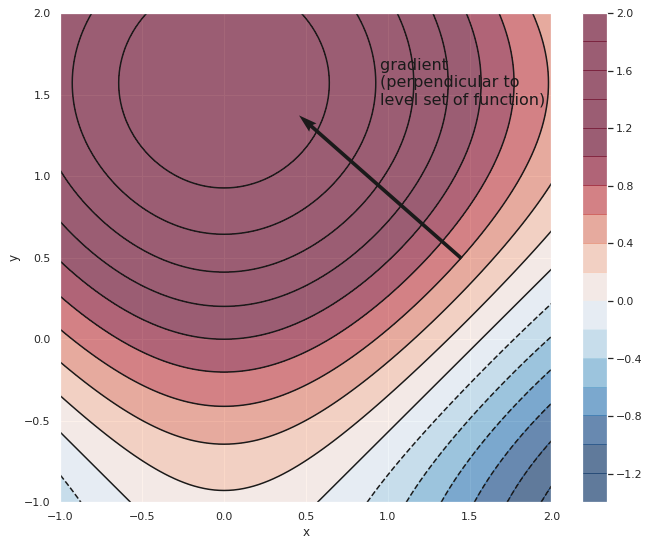

In [451]:
x = np.linspace(-1,2,100)
y = np.linspace(-1,2,100)
X,Y = np.meshgrid(x, y)
sigma = 1

f_XY = np.cos(X)+np.sin(Y)


plt.figure(figsize=(11,9))

cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',vmin=-1,vmax=1,alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel('x')
plt.ylabel('y')



draw_vector_2D(plt, 1.45, 0.5, -np.sin(1.45),np.cos(0.5), 'gradient \n(perpendicular to \nlevel set of function)','k')




[[4 3]
 [3 4]]
(40, 1)
[[42.5819951]] [[-8.84456482]]


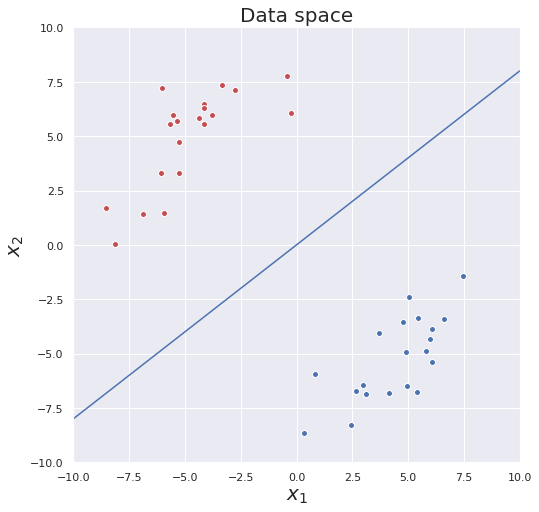

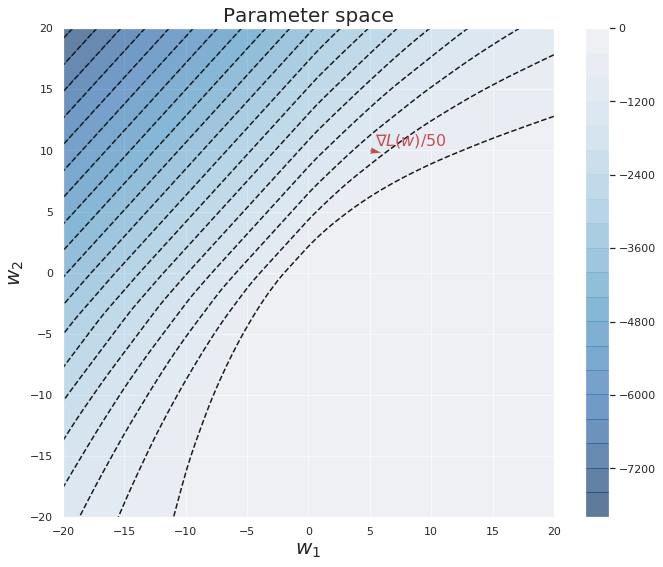

In [472]:
# Previous example
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

print(cov_positive)

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))

X = np.vstack([X_positive, X_negative])
Y = np.vstack([np.ones((X_positive.shape[0],1)),np.zeros((X_negative.shape[0],1))])

plt.figure(figsize=(8,8))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.plot(x1, x1*0.8)

plt.axis([-10,10,-10,10],'equal')
plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20)
plt.title('Data space',fontsize=20)


w1x = np.linspace(-20,20,100)
w2x = np.linspace(-20,20,100)
W1,W2 = np.meshgrid(w1x, w2x)


## ommiting w_0 just for illustration
def loss_compute(w1,w2,X,Y):
    w = np.array([[w1],[w2]]) # make w_vec
    loss = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
#     loss /= (X_positive.shape[0]+ X_negative.shape[0])
    #     loss += - (w1**2 + w2**2)*10
    return loss

plt.figure(figsize=(11,9))

L_w = np.zeros((len(w1x),len(w2x)))

for i1,w1 in enumerate(w1x):
    for i2,w2 in enumerate(w2x):
        L_w[i1,i2] = loss_compute(w1,w2,X,Y)
        

cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                                                            vmax=np.max(np.abs(L_w)),
                                                            alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20)


## ommiting w_0 just for illustration
def gradient_compute(w1,w2,X,Y):
    # positive samples
#     X = np.vstack([X_positive,X_negative])
#     Y = np.vstack([np.ones((X_positive.shape[0],1)),np.zeros((X_negative.shape[0],1))])
#     print(Y.shape)
    w = np.array([[w1],[w2]])
    P_Y_1 = np.exp(X.dot(w))/(1+ np.exp(X.dot(w)))
    print(P_Y_1.shape)
    gw1 = - X[:,0:1].T.dot((Y-P_Y_1))
    gw2 = - X[:,1:2].T.dot((Y-P_Y_1))
    print(gw1, gw2)
    return gw1, gw2

w1 = 5; w2 = 10
gw1, gw2 = gradient_compute(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/50,gw2/50, r'$\nabla L(w)/50$','r');



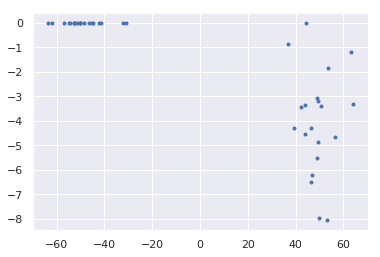

In [429]:
w1 = -5; w2 = 5;
X_dot_w = X.dot(np.array([w1,w2]))
# plt.plot(X_dot_w)
loss = Y*X_dot_w - np.log(1+ np.exp(X_dot_w))
w = np.array([[w1],[w2]])
P_Y_1 = 1/(1+ np.exp(X.dot(w)))
P_Y_1.shape
plt.plot(X.dot(w),(X[:,0:1]*(1-P_Y_1)).reshape(-1),'.');

In [430]:
(X[:,0:1]*(1-P_Y_1)).sum(), (X[:,1:2]*(1-P_Y_1)).sum()

(-80.64645039762118, 115.03599773043993)

#### Function with training data and parameters... loss vs hypothetical function


## Need to regularize the weights

- $w\rightarrow \infty$ if the data is linearly separable

- For MAP, need to define prior on $W$
    - given $W = (w_1, … w_d)$
    - let’s assume prior $P(w_i) = \mathcal{N}(0, \sigma)$

- A kind of Occam’s razor (simplest is best) prior

- Helps avoid very large weights and overfitting

## Adding a prior on $W$

MAP estimation picks the parameter $W$ that has maximum posterior probability $P(W|Y,X)$ given the conditional likelihood $P(Y|W,X)$ and the prior $P(W)$.

Using Bayes rule again:

\begin{eqnarray} W^{MAP} &=& \underset{W}{\operatorname{argmax}} P(W|Y,W) \\
&=& \underset{W}{\operatorname{argmax}} \frac{P(Y|W,X)P(W,X)}{P(Y,X)} \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W,X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)P(X) ~~~~~ \text{ let's assume} P(W,X) = P(W)P(X) \\
&=& \underset{W}{\operatorname{argmax}} P(Y|W,X)P(W)\\
&=& \underset{W}{\operatorname{argmax}} \ln P(Y|W,X) + \ln P(W)
\end{eqnarray}

Zero Mean Gaussian prior on $W$: $W\sim \frac{1}{2\pi\sigma^2}\exp\big(-\frac{1}{2\sigma^2}\sum_iw_i^2 \big )$

\begin{eqnarray} W^{MAP}  = \underset{W}{\operatorname{argmax}} \ln P(Y|W,X) - \left(\frac{1}{2\sigma^2}\sum_iw_i^2 \right )
\end{eqnarray}

(40, 1)
[[138.18196438]] [[-156.60707659]]


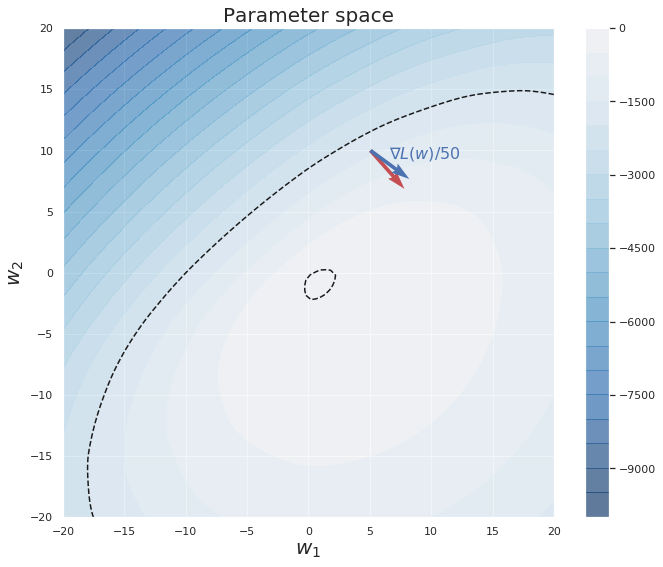

In [471]:
# # Previous example
# mu_1_1 = -5; sigma_1_1 = 4
# mu_2_1 = 5; sigma_2_1 = 3
# mu_1_0 = 5; sigma_1_0 = 2
# mu_2_0 = -5; sigma_2_0 = 2

# cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
# cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

# print(cov_positive)

# # Sample data from these distributions
# X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (20))
# X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (20))


# plt.figure(figsize=(8,8))

# plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
# plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
# plt.plot(x1, x1*0.8)

# plt.axis([-10,10,-10,10],'equal')
# plt.xlabel(r'$x_1$',fontsize=20)
# plt.ylabel(r'$x_2$',fontsize=20)
# plt.title('Data space',fontsize=20)


# w1x = np.linspace(-20,20,100)
# w2x = np.linspace(-20,20,100)
# W1,W2 = np.meshgrid(w1x, w2x)


## ommiting w_0 just for illustration
lmbda = 2
def loss_compute(w1,w2,X,Y):
    w = np.array([[w1],[w2]]) # make w_vec
    loss = np.sum(Y*X.dot(w) - np.log(1+ np.exp(X.dot(w))))
#     loss /= (X_positive.shape[0]+ X_negative.shape[0])
    #     loss += - (w1**2 + w2**2)*10
    loss += - (w1**2 + w2**2)*lmbda
    return loss

plt.figure(figsize=(11,9))

L_w = np.zeros((len(w1x),len(w2x)))

for i1,w1 in enumerate(w1x):
    for i2,w2 in enumerate(w2x):
        L_w[i1,i2] = loss_compute(w1,w2,X,Y)
        

cs = plt.contourf(W1, W2, L_w,20,cmap='RdBu_r',vmin=-np.max(np.abs(L_w)),
                                                            vmax=np.max(np.abs(L_w)),
                                                            alpha=0.6);
plt.colorbar()
contours = plt.contour(cs,levels=[-10,-2000], colors='k')
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('Parameter space',fontsize=20)


## ommiting w_0 just for illustration
def gradient_compute(w1,w2,X,Y):
    # positive samples
#     X = np.vstack([X_positive,X_negative])
#     Y = np.vstack([np.ones((X_positive.shape[0],1)),np.zeros((X_negative.shape[0],1))])
#     print(Y.shape)
    w = np.array([[w1],[w2]])
    P_Y_1 = 1/(1+ np.exp(X.dot(w)))
    print(P_Y_1.shape)
    gw1 = - X[:,0:1].T.dot((Y-P_Y_1))
    gw2 = - X[:,1:2].T.dot((Y-P_Y_1))
    print(gw1, gw2)
    return gw1, gw2

w1 = 5; w2 = 10
gw1, gw2 = gradient_compute(w1,w2,X, Y)
draw_vector_2D(plt, w1,w2,gw1/50,gw2/50, r' ','r');
draw_vector_2D(plt, w1,w2,(gw1+lmbda*w1*2)/50,(gw2+lmbda*w2*2)/50, r'$\nabla L(w)/50$','b');



In [335]:
lmbda*w1*2

10